In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('../datasets/train.csv')

In [4]:
train_data.shape

(878049, 9)

In [5]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [6]:
train_data.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [7]:
categorys = train_data['Category'].unique()
categorys

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [8]:
# 犯罪类别个数
len(categorys)

39

In [9]:
Pd_districts = train_data['PdDistrict'].unique()
Pd_districts

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [10]:
len(Pd_districts)

10

In [11]:
test_data = pd.read_csv('../datasets/test.csv')

In [12]:
test_data.shape

(884262, 7)

In [13]:
test_data.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [14]:
test_data.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [15]:
def plot_bar_by_feature(feature, size_delta=(0,0)):
    features = train_data.columns.tolist()
    if feature not in features:
        return
    data = {feature:[], 'counts':[]}
    for a in train_data[feature].unique():
        data[feature].append(a)
        data['counts'].append(train_data[train_data[feature] == a].shape[0])
    DFData = pd.DataFrame(data)
    DFData = DFData.sort_values(by=['counts'], ascending=False)
    a = DFData.plot.bar(x=feature, y='counts')
    W,H = a.figure.get_size_inches()
    a.figure.set_size_inches(W+size_delta[0],H+size_delta[1])
    a.figure.savefig('../images/'+feature)

In [16]:
plot_bar_by_feature('PdDistrict', size_delta=(0,5))
plot_bar_by_feature('DayOfWeek', size_delta=(0,5))
plot_bar_by_feature('Category', size_delta=(10,15))

In [17]:
train_data_dates = train_data.set_index( pd.DatetimeIndex(train_data['Dates'].tolist()))

In [18]:
print(train_data_dates.between_time('00:00', '01:00', include_end=False).shape[0])
print(train_data_dates.between_time('23:00', '00:00', include_end=False).shape[0])

44865
42460


In [19]:
hours_data = {'clock':[], 'counts':[]}
for t in range(24):
    hours_data['clock'].append(t)
    begin = '{}:00'.format(t)
    end = '{}:00'.format((t+1)%24)
    hours_data['counts'].append(train_data_dates.between_time(begin, end, include_end=False).shape[0])
    

hours_data = pd.DataFrame(hours_data)
hours_data = hours_data.sort_values(by='counts', ascending=False)

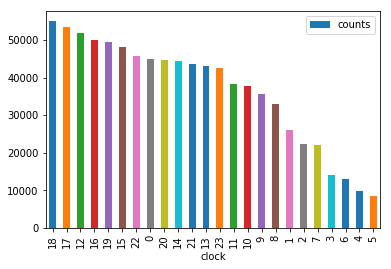

In [20]:
a = hours_data.plot.bar(x='clock', y='counts')
a.figure.savefig('../images/hours')

In [21]:
len(train_data['Address'])

878049

In [22]:
len(train_data['Address'].unique())

23228

In [23]:
train_data['Address'].unique()[0]

'OAK ST / LAGUNA ST'

In [24]:
# 按地址发生案件数量进行排序
address_data = {'address':[], 'counts':[]}
for addr in train_data['Address'].unique():
    address_data['address'].append(addr)
    address_data['counts'].append(train_data[train_data['Address'] == addr].shape[0])

KeyboardInterrupt: 

In [ ]:
address_data = pd.DataFrame(address_data)
address_data = address_data.sort_values(by='counts', ascending=False)

In [ ]:
print(address_data[:20])